# Loading Test Images

In [15]:
# Loading Test Image


# Importing used Librarys
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2

#from moviepy.editor import VideoFileClip

In [16]:
def list_images(images,cols=2,row=5,cmap=None):
    plt.figure(figsize=(10,11))
    for i, image in enumerate(images):
        plt.subplot(row,cols,i+1)

        cmap = 'grey' if len(image.shape) == 2 else cmap
        plt.imshow(image,cmap = cmap)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout(pad=0,h_pad=0,w_pad=0)
    plt.show()

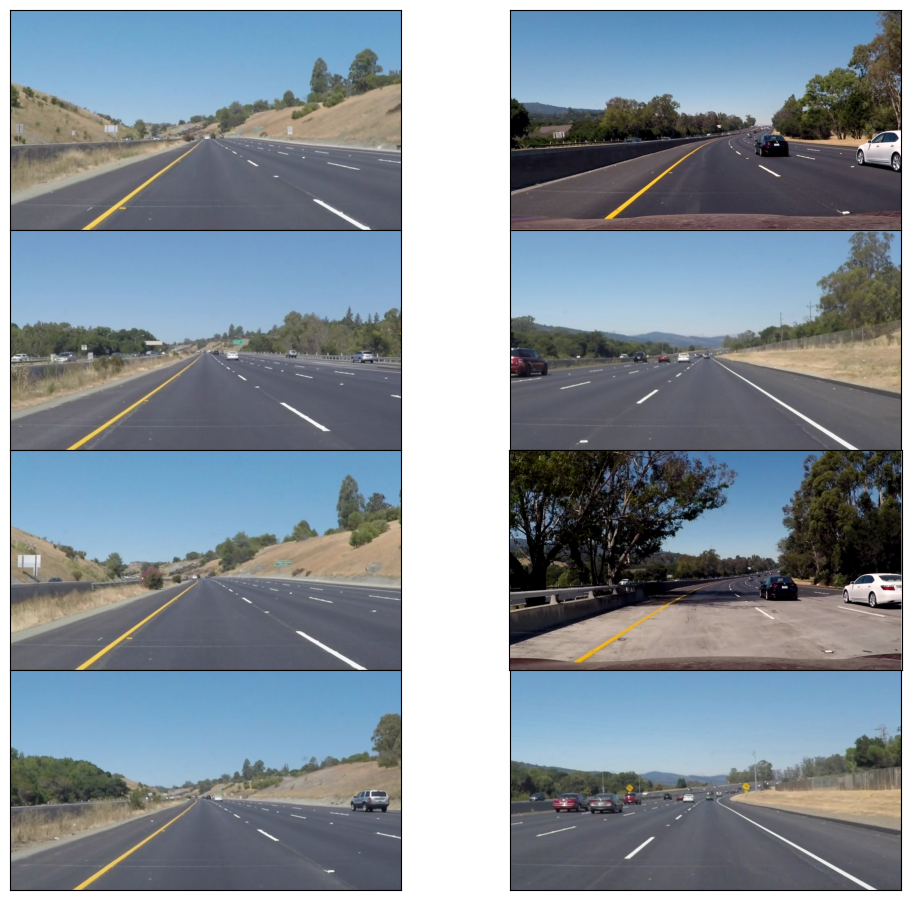

In [14]:
test_images = [plt.imread(img) for img in glob.glob('test_images/*.jpg')]
list_images(test_images)

# Color Selection


Lane lines in the test images are in white and yellow. We need to choose the most suitable color space, that clearly highlights the lane lines

### Original RGB COLOR SELECTION

In [21]:
def RGB_COLOR_SELECTION(image):
    # The simplest thresholding methods replace each pixel in an image with a black pixel if the image intensity is less than a fixed value called the threshold
    
    
    # White mask
    lower_threshold = np.uint8([200,200,200])
    upper_thershold = np.uint8([255,255,255])
    white_mask = cv2.inRange(image,lower_threshold,upper_thershold)

    # Yellow mask
    lower_threshold = np.uint8([175,175,0])
    upper_thershold = np.uint8([255,255,255])
    yellow_mask = cv2.inRange(image,lower_threshold,upper_thershold)

    # Both White and Yellow
    mask = cv2.bitwise_or(white_mask,yellow_mask)
    masked_image = cv2.bitwise_and(image,image,mask=mask)

    return masked_image

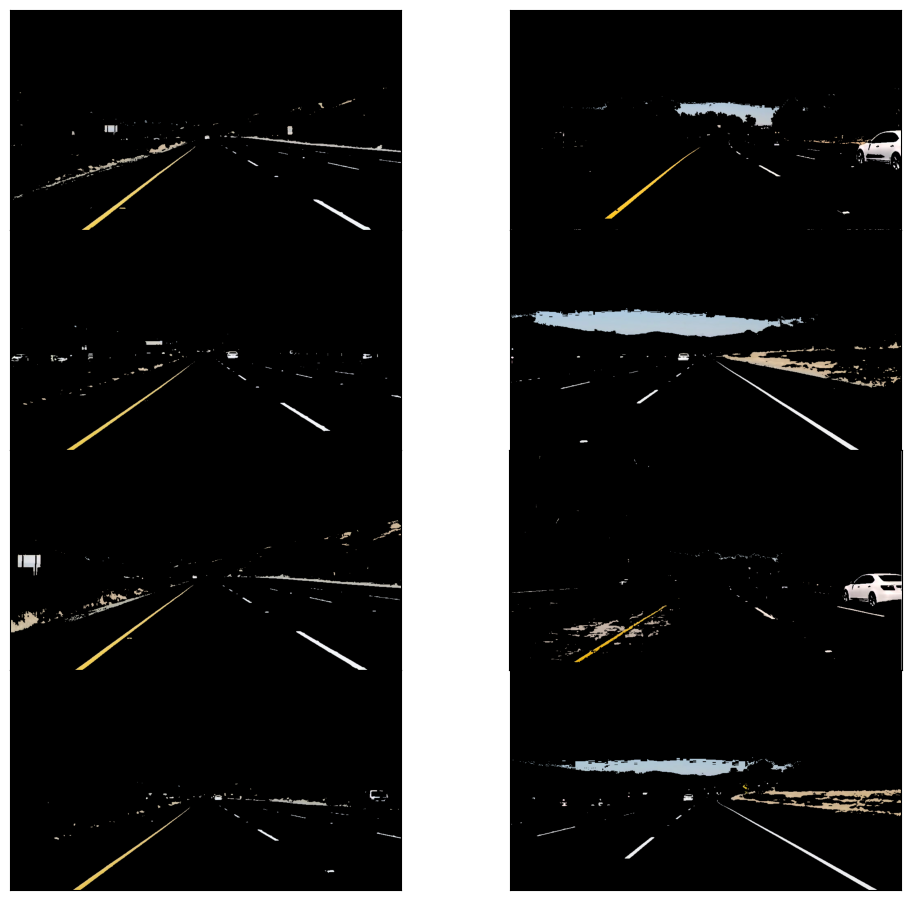

In [22]:
list_images(list(map(RGB_COLOR_SELECTION,test_images)))